In [0]:
%pip install -r '/dbfs/mnt/sdscdata/requirements.txt'

Python interpreter will be restarted.
Requirement already satisfied: keras-nightly==2.5.0.dev2021032900 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 1)) (2.5.0.dev2021032900)
Requirement already satisfied: tensorflow==2.5.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 2)) (2.5.0)
Collecting scikit-image==0.17.2
 Downloading scikit_image-0.17.2-cp38-cp38-manylinux1_x86_64.whl (12.4 MB)
Requirement already satisfied: scikit-learn==0.24.1 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 4)) (0.24.1)
Collecting labelme==4.5.9
 Downloading labelme-4.5.9.tar.gz (1.5 MB)
Collecting pycocotools==2.0.2
 Downloading pycocotools-2.0.2.tar.gz (23 kB)
Requirement already satisfied: scipy==1.6.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 7)) (1.6.2)
Collecting tqdm==4.62.2
 Downloading tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
Requirement already satisfied: h5py==3.1.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 9)) (3.1.0)
Requirement already satisfied: numpy==1.19.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 10)) (1.19.2)
Requirement already satisfied: pandas==1.2.4 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (1.2.4)
Collecting imgviz>=0.11.0
 Downloading imgviz-1.4.1.tar.gz (7.7 MB)
 Installing build dependencies: started
 Installing build dependencies: finished with status 'done'
 Getting requirements to build wheel: started
 Getting requirements to build wheel: finished with status 'done'
 Preparing wheel metadata: started
 Preparing wheel metadata: finished with status 'done'
Collecting matplotlib<3.3
 Downloading matplotlib-3.2.2-cp38-cp38-manylinux1_x86_64.whl (12.4 MB)
Requirement already satisfied: Pillow>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (8.2.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.4.1)
Collecting qtpy
 Downloading QtPy-1.11.2-py2.py3-none-any.whl (58 kB)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.1.0)
Collecting PyQt5!=5.15.3,!=5.15.4
 Downloading PyQt5-5.15.6-cp36-abi3-manylinux1_x86_64.whl (8.3 MB)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2.8.1)
Requirement already satisfied: setuptools>=18.0 in /usr/local/lib/python3.8/dist-packages (from pycocotools==2.0.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (52.0.0)
Requirement already satisfied: cython>=0.27.3 in /databricks/python3/lib/python3.8/site-packages (from pycocotools==2.0.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (0.29.23)
Requirement already satisfied: PyWavelets>=1.1.1 in /databricks/python3/lib/python3.8/site-packages (from scikit-image==0.17.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (1.1.1)
Requirement already satisfied: networkx>=2.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-image==0.17.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (2.5)
Collecting tifffile>=2019.7.26
 Downloading tifffile-2021.11.2-py3-none-any.whl (178 kB)
Collecting imageio>=2.3.0
 Downloading imageio-2.10.3-py3-none-any.whl (3.3 MB)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/

In [0]:
import numpy as np

import tensorflow as tf
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

import skimage
from skimage.io import imread
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
import os
import pandas as pd

In [0]:
%run ./custom_functions

Python interpreter will be restarted.
Requirement already satisfied: labelme in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (4.5.9)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from labelme) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from labelme) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from labelme) (1.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.19.2)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from labelme) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from labelme) (5.15.6)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (1.3.1)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib<3.3->labelme) (1.15.0)
Requirement already satisfied: PyQt5-sip<13,>=12.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (12.9.0)
Requirement already satisfied: PyQt5-Qt5>=5.15.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (5.15.2)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-516cc093-6a14-4cf1-82c3-abccb58fc140/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
# loading the scores and the weather station data again, as we need it for submitting our results
label_scores = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/label_scores.csv', sep=';')
labels = list(label_scores.labels.values)
# SA --> mean of the yearly sum of hours of sun over the last years
weather = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/weather_station_file.csv', sep=',')

In [0]:
TEAM_MOUNT = '/dbfs/mnt/team32storage/'

# Train
IMAGES_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/JPEGImages')
MASKS_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/SegmentationClassPNG')
# VAL
IMAGES_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/JPEGImages')
MASKS_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/SegmentationClassPNG')

IMAGE_SIZE = 512

## Load model

In [0]:
model_file_path = str([p.path for p in dbutils.fs.ls("/mnt/team32storage/models") if p.name.endswith('.h5')][4])
model_file_path

Out[4]: 'dbfs:/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_focalloss.h5'

In [0]:
model_file_path = str([p.path for p in dbutils.fs.ls("/mnt/team32storage/models") if p.name.endswith('.h5') ][4])
model_file_path
model_name = 'unet_resnet50_stratSplit_diceloss_focalloss.h5'
dbutils.fs.cp(model_file_path, str("/dbfs/mnt/team32storage/models/"+model_name))

Out[5]: True

In [0]:
dbutils.fs.ls("/mnt/team32storage/models")

Out[55]: [FileInfo(path='dbfs:/mnt/team32storage/models/.init', name='.init', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_catCE_dropout_02.h5', name='unet_aug_catCE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_cat_CE_dropout_02.h5', name='unet_aug_cat_CE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_diceloss.h5', name='unet_aug_diceloss.h5', size=26357524),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_stratSplit_diceloss.h5', name='unet_aug_stratSplit_diceloss.h5', size=26356484),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', name='unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_resnet_aug_stratSplit_diceloss_layer0.h5', name='unet_resnet_aug_stratSplit_diceloss_layer0.h5', size=294177712),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_resnet_aug_stratSplit_diceloss_weighted_focalloss.h5', name='unet_resnet_aug_stratSplit_diceloss_weighted_focalloss.h5', size=294205772),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_resnet_aug_stratSplit_weighted_diceloss.h5', name='unet_resnet_aug_stratSplit_weighted_diceloss.h5', size=294205772)]

In [0]:
dbutils.fs.ls("/dbfs/mnt/team32storage/models")

Out[6]: [FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_catCE_dropout_02.h5', name='unet_aug_catCE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_diceloss.h5', name='unet_aug_diceloss.h5', size=26357524),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_focal_loss_dropout_02.h5', name='unet_aug_focal_loss_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_stratSplit_diceloss.h5', name='unet_aug_stratSplit_diceloss.h5', size=294205772),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_focalloss.h5', name='unet_resnet50_stratSplit_diceloss_focalloss.h5', size=203673444),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', name='unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', size=0),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet_aug_stratSplit_weighted_diceloss.h5', name='unet_resnet_aug_stratSplit_weighted_diceloss.h5', size=294205772)]

In [0]:
from tensorflow.python.keras.models import load_model

train_jpg = []
train_json = []
for file in dbutils.fs.ls("/mnt/sdscdata/data/raw/train"):
  if(file.name[-4:] == 'jpeg'):
    train_jpg.append(file.name)
  if(file.name[-4:] == 'json'):
    train_json.append(file.name)
    
model_name = 'unet_resnet50_stratSplit_diceloss_focalloss.h5'
unet = load_model("/dbfs/mnt/team32storage/models/"+model_name, compile=False)

In [0]:
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type) Output Shape Param # Connected to 
==================================================================================================
data (InputLayer) [(None, 512, 512, 3) 0 
__________________________________________________________________________________________________
bn_data (BatchNormalization) (None, 512, 512, 3) 9 data[0][0] 
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D) (None, 518, 518, 3) 0 bn_data[0][0] 
__________________________________________________________________________________________________
conv0 (Conv2D) (None, 256, 256, 64) 9408 zero_padding2d[0][0] 
__________________________________________________________________________________________________
bn0 (BatchNormalization) (None, 256, 256, 64) 256 conv0[0][0] 
__________________________________________________________________________________________________
relu0 (Activation) (None, 256, 256, 64) 0 bn0[0][0] 
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 258, 258, 64) 0 relu0[0][0] 
__________________________________________________________________________________________________
pooling0 (MaxPooling2D) (None, 128, 128, 64) 0 zero_padding2d_1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn1 (BatchNormaliz (None, 128, 128, 64) 256 pooling0[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu1 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv1 (Conv2D) (None, 128, 128, 64) 4096 stage1_unit1_relu1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn2 (BatchNormaliz (None, 128, 128, 64) 256 stage1_unit1_conv1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu2 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn2[0][0] 
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 130, 130, 64) 0 stage1_unit1_relu2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv2 (Conv2D) (None, 128, 128, 64) 36864 zero_padding2d_2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn3 (BatchNormaliz (None, 128, 128, 64) 256 stage1_unit1_conv2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu3 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn3[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv3 (Conv2D) (None, 128, 128, 256 16384 stage1_unit1_relu3[0][0] 
__________________________________________________________________________________________________
stage1_unit1_sc (Conv2D) (None, 128, 128, 256 16384 stage1_unit1_relu1[0][0] 
__________________________________________________________________________________________________
add (Add) (None, 128, 128, 256 0 stage1_unit1_conv3[0][0] 
 stage1_unit1_sc[0][0] 
__________________________________________________________________________________________________
stage1_unit2_bn1 (BatchNormaliz (None, 128, 128, 256 1024 add[0][0] 
__________________________________________________________________________________________________
stage1_unit2_relu1 (Activation) (None, 128, 128, 256 0 stage1_unit2_bn1[0][0] 
_____________________________________________________________

### Load images

In [0]:
colors = {# 0: (0, 0, 0), # BG
            1:  (128, 0, 0), # asphalt
            2:  (0, 128, 0), # sealed_other 
            3:  (128, 128, 0), # gravel_clay 
            4:  (0, 0, 128), # field 
            5:  (128, 0, 128), # water 
            6:  (0, 128, 128), # meadow 
            7:  (128, 128, 128), # lawn 
            8:  (64, 0, 0), # pool 
            9:  (192, 0, 0), # roof_other 
            10: (64, 128, 0), # roof_flat_residential 
            11: (192, 128, 0), # roof_pitched_industrial 
            12: (64, 0, 128), # roof_flat_industrial 
            13: (192, 0, 128), # roof_pitched_residental 
            14: (64, 128, 128), # hedge 
            15: (192, 128, 128), # tree_group
            16: (0, 64, 0), # tree 
            17: (128, 64, 0), # vehicle
                } 

n_labels = len(colors)

In [0]:
TEAM_MOUNT = '/dbfs/mnt/team32storage/'

# Train
IMAGES_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/JPEGImages')
MASKS_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/SegmentationClassPNG')
# VAL
IMAGES_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/JPEGImages')
MASKS_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/SegmentationClassPNG')

IMAGE_SIZE = 512

In [0]:
%run ./helpers

In [0]:
X_train = load_images([f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')], IMAGE_SIZE)
X_val = load_images([f for f in Path(IMAGES_DIR_VAL).glob('*.jpg')], IMAGE_SIZE)

y_train = load_masks([f for f in Path(MASKS_DIR_TRAIN).glob('*.png')], colors)
y_val = load_masks([f for f in Path(MASKS_DIR_VAL).glob('*.png')], colors)

In [0]:
X_train = X_train.astype(float)/255
X_val = X_val.astype(float)/255

X_train_mean0 = X_train[:,:,:,0].mean()
X_train_mean1 = X_train[:,:,:,1].mean()
X_train_mean2 = X_train[:,:,:,2].mean()

X_train_std0 = X_train[:,:,:,0].std()
X_train_std1 = X_train[:,:,:,1].std()
X_train_std2 = X_train[:,:,:,2].std()

print(X_train_mean0, X_train_std0)
print(X_train_mean1, X_train_std1)
print(X_train_mean2, X_train_std2)
print('')

X_train[:,:,:,0] = (X_train[:,:,:,0]-X_train_mean0)/X_train_std0
X_train[:,:,:,1] = (X_train[:,:,:,1]-X_train_mean1)/X_train_std1
X_train[:,:,:,2] = (X_train[:,:,:,2]-X_train_mean2)/X_train_std2

X_val[:,:,:,0] = (X_val[:,:,:,0]-X_train_mean0)/X_train_std0
X_val[:,:,:,1] = (X_val[:,:,:,1]-X_train_mean1)/X_train_std1
X_val[:,:,:,2] = (X_val[:,:,:,2]-X_train_mean2)/X_train_std2

print(X_train[:,:,:,0].mean(), X_train[:,:,:,0].std())
print(X_train[:,:,:,1].mean(), X_train[:,:,:,1].std())
print(X_train[:,:,:,2].mean(), X_train[:,:,:,2].std())
print(X_train[:,:,:,:].mean(), X_train[:,:,:,:].std())

print('')
print(X_val[:,:,:,0].mean(), X_val[:,:,:,0].std())
print(X_val[:,:,:,1].mean(), X_val[:,:,:,1].std())
print(X_val[:,:,:,2].mean(), X_val[:,:,:,2].std())
print(X_val[:,:,:,:].mean(), X_val[:,:,:,:].std())

0.5121559434631898 0.20860198337842734
0.5135619059455974 0.19516940448722397
0.47492319267651373 0.20063213404660432
-5.406447263598446e-15 0.9999999999999987
6.133965203961088e-15 1.000000000000002
-1.5535571195503823e-15 1.0000000000000009
-1.8877504633911206e-16 1.0000000000000009

0.0319056945663586 0.963930636215295
0.018032966557121274 0.9681222092563488
0.04774131142351926 0.9573530964322262
0.032559990848999826 0.9632219837211259

### Load image and prediction

In [0]:
def display_prediction_all_layers(pred, mask, img):
  mask = mask.astype(int)
  # creating multiple subplots
  fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,20), gridspec_kw = {'wspace':0.01, 'hspace':0})
 
  # title for the entire figure
  fig.suptitle('Every layers of the mask', fontsize=20)
  
  titles = labels.copy()
  titles.append('Train image')
  titles.append('Collision mask')
  
  
 
  # filling subplots with pictures
  for i, ax in enumerate(fig.axes):
    if i < pred.shape[2]:
      ax.imshow(mask[:,:,i], vmin=0, vmax=1)
      if i < pred.shape[2]:
          ax.imshow(pred[:,:,i], vmin=0, vmax=1, alpha=0.2, cmap='Greens')
    # removing axes of the subplots
    if(i == len(fig.axes)-1):
       ax.imshow(img)
    ax.set_title(titles[i])
    ax.axis('off')

In [0]:
def DiceScore_square(y_true, y_pred, smooth=1):
  y_true_f = y_true.flatten()
  y_pred_f = y_pred.flatten()
  intersection = np.sum(np.abs(y_true_f * y_pred_f))
  return ((2. * intersection + smooth) / (np.sum(np.square(y_true_f),-1) + np.sum(np.square(y_pred_f),-1) + smooth))

def DiceScore(y_true, y_pred, smooth=1):
  y_true_f = y_true.flatten()
  y_pred_f = y_pred.flatten()
  intersection = np.sum(y_true_f * y_pred_f)
  return ((2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth))

In [0]:
y_train.shape

Out[48]: (255, 512, 512, 17)

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
purple : true negative
black purple : false positive
yellow : false negative
yellow-green : true positive
Dice score 0.8508379920234832
Dice square score 0.8508379920234832
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

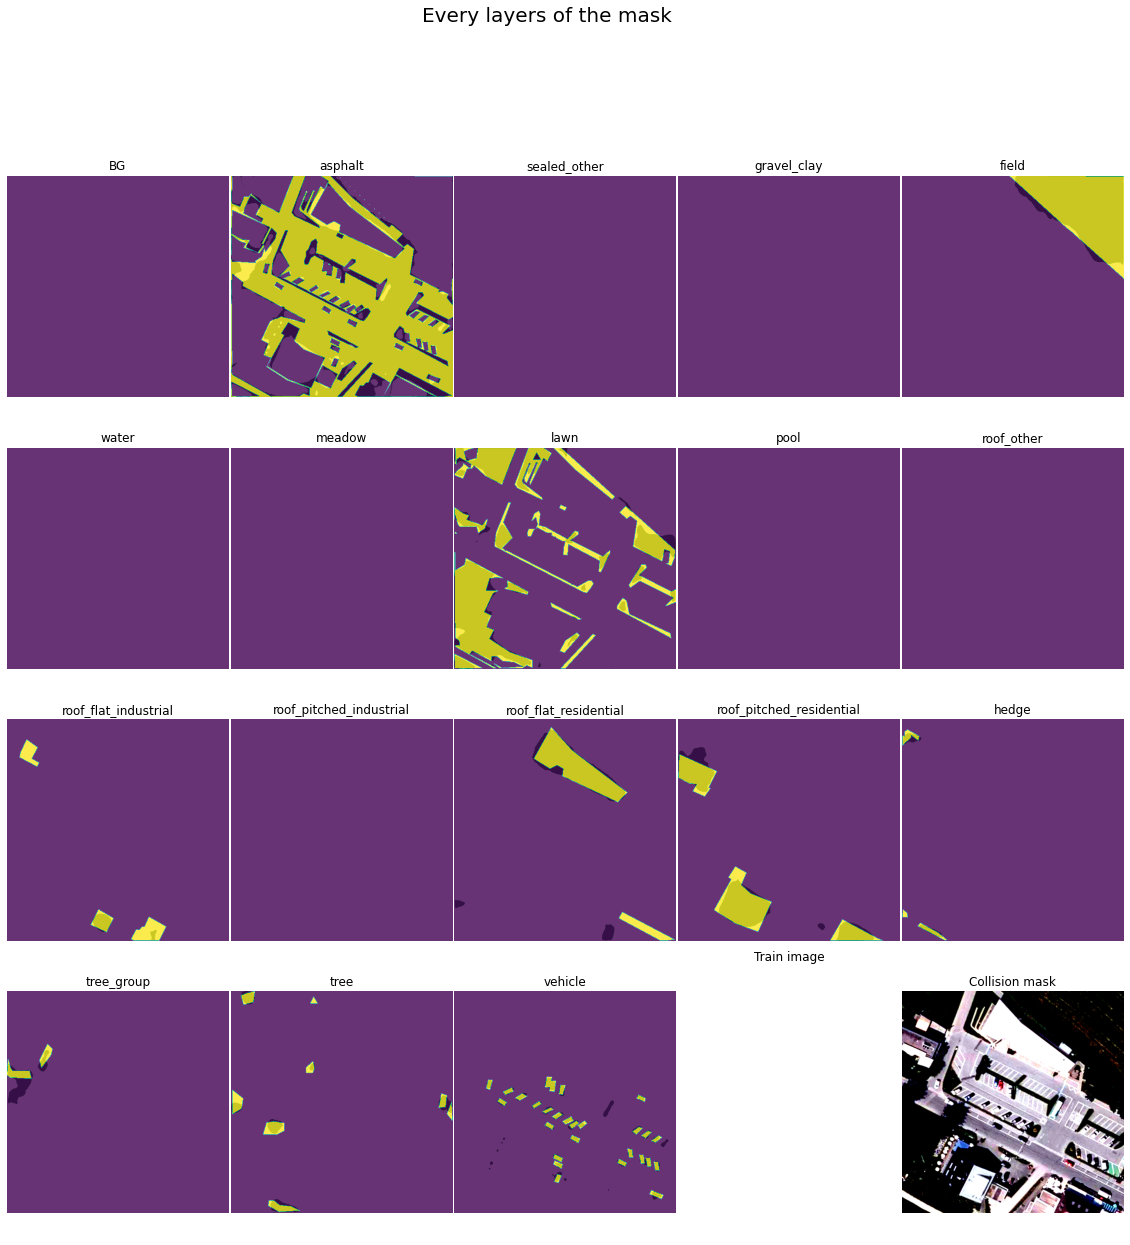

In [0]:
index = 10

img = X_train[index,:,:,:]
img_mask = y_train[index,:,:,:]
pred = np.squeeze(unet.predict(np.expand_dims(X_train[index,:,:,:], axis=0), verbose=1))
for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        index_of_max = np.argmax(pred[i,j,:], axis=-1)
        pred[i,j,:] = 0
        pred[i,j,index_of_max] = 1
pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)
img_mask = np.insert(img_mask, 0, np.zeros((512,512)), axis=2)

print("purple : true negative")
print("black purple : false positive")
print("yellow : false negative")
print("yellow-green : true positive")

print("Dice score", DiceScore(img_mask, pred))
print("Dice square score", DiceScore_square(img_mask, pred))


display_prediction_all_layers(pred, img_mask, img)

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 32ms/step
(512, 512, 17)
(512, 512, 17)
purple : true negative
black purple : false positive
yellow : false negative
yellow-green : true positive
Dice score 0.19959146209776113
Dice square score 0.19959146209776113

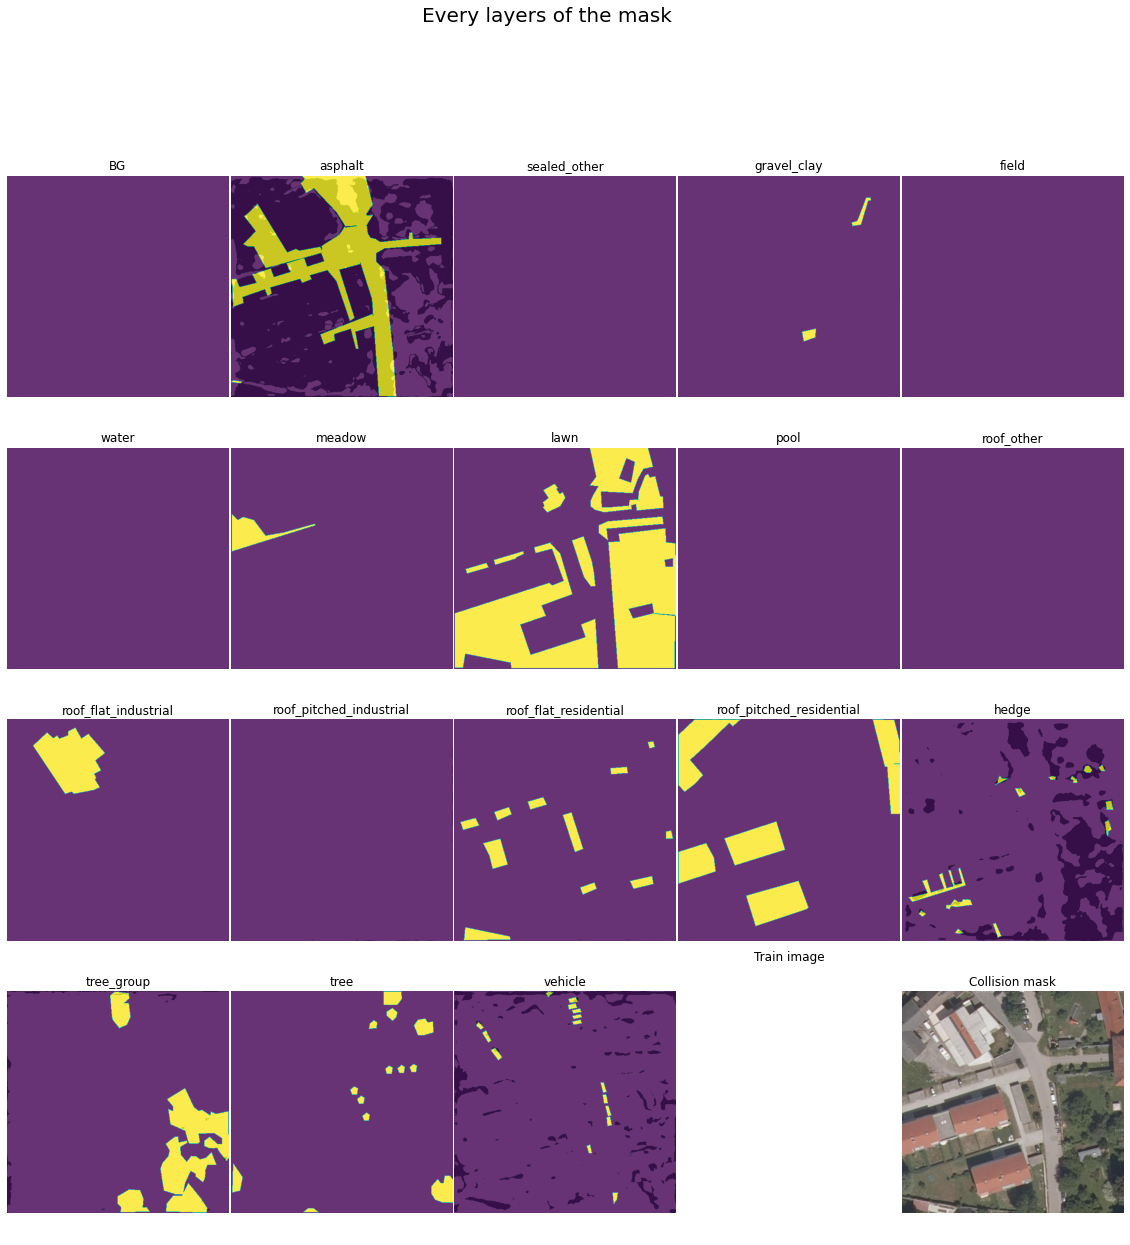

In [0]:
index = 3
confidence = 0.2

jpeg_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_jpg[index])
json_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_json[index])

#loading the image
img = mpimg.imread(jpeg_path)
img_mask = mask_from_json(json_path)

img_ = np.expand_dims(img[:, :, :3], axis=0)
pred = np.squeeze(unet.predict(img_, verbose=1))
print(pred.shape)
pred = np.where(pred >= confidence, 1, 0)
print(pred.shape)
pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)

#the highest label is kept and we remove the other ones for each pixel
# temp = np.zeros((512,512))
# for i in range(pred.shape[2]):
#     pred[:,:,i] = pred[:,:,i]*i
# temp = np.max(pred, axis=-1)
# for i in range(pred.shape[2]):
#     pred[:,:,i] = np.where(temp == i, 1, 0)    


print("purple : true negative")
print("black purple : false positive")
print("yellow : false negative")
print("yellow-green : true positive")

print("Dice score", DiceScore(img_mask, pred))
print("Dice square score", DiceScore_square(img_mask, pred))


display_prediction_all_layers(pred, img_mask, img)

## Calculate dice score on training set

#### Argmax

In [0]:
dice_score_sum = 0

for index in range(X_train.shape[0]):
    img = X_train[index,:,:,:]
    img_mask = y_train[index,:,:,:]
    pred = np.squeeze(unet.predict(np.expand_dims(X_train[index,:,:,:], axis=0), verbose=1))
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            index_of_max = np.argmax(pred[i,j,:], axis=-1)
            pred[i,j,:] = 0
            pred[i,j,index_of_max] = 1
    pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)
    img_mask = np.insert(img_mask, 0, np.zeros((512,512)), axis=2)
    
    dice_score_sum += DiceScore(img_mask, pred)
    #dice_score_square_sum += DiceScore_square(img_mask, pred)
    #print("Dice score", DiceScore(img_mask, pred))

print("Dice score", dice_score_sum/X_train.shape[0])
#print("Dice square score", dice_score_square_sum/len(train_jpg))

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 32ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 31ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s

In [0]:
print("Dice score train", dice_score_sum/X_train.shape[0])
#print("Dice square score", dice_score_square_sum/len(train_jpg))

Dice score train 0.8645463572534214

In [0]:
dice_score_sum = 0

for index in range(X_val.shape[0]):
    img = X_val[index,:,:,:]
    img_mask = y_val[index,:,:,:]
    pred = np.squeeze(unet.predict(np.expand_dims(X_val[index,:,:,:], axis=0), verbose=1))
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            index_of_max = np.argmax(pred[i,j,:], axis=-1)
            pred[i,j,:] = 0
            pred[i,j,index_of_max] = 1
    pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)
    img_mask = np.insert(img_mask, 0, np.zeros((512,512)), axis=2)
    
    dice_score_sum += DiceScore(img_mask, pred)
    #dice_score_square_sum += DiceScore_square(img_mask, pred)
    #print("Dice score", DiceScore(img_mask, pred))

print("Dice score", dice_score_sum/X_val.shape[0])
#print("Dice square score", dice_score_square_sum/len(train_jpg))

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 29ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s

In [0]:
print("Dice score test", dice_score_sum/X_val.shape[0])

Dice score test 0.6972683565967716

#### Confidence

In [0]:
confidence = 0.2

dice_score_sum = 0
dice_score_square_sum = 0

for i in range(len(train_jpg)):
    jpeg_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_jpg[i])
    json_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_json[i])

    #loading the image
    img = mpimg.imread(jpeg_path)
    img_mask = mask_from_json(json_path)

    img_ = np.expand_dims(img[:, :, :3], axis=0)
    pred = np.squeeze(unet.predict(img_, verbose=1))
    pred = np.where(pred >= confidence, 1, 0)
    pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)

    #the highest label is kept and we remove the other ones for each pixel
    temp = np.zeros((512,512))
    for i in range(pred.shape[2]):
        pred[:,:,i] = pred[:,:,i]*i
    temp = np.max(pred, axis=-1)
    for i in range(pred.shape[2]):
        pred[:,:,i] = np.where(temp == i, 1, 0)    


    
    dice_score_sum += DiceScore(img_mask, pred)
    #dice_score_square_sum += DiceScore_square(img_mask, pred)
    #print("Dice score", DiceScore(img_mask, pred))

print("Dice score", dice_score_sum/len(train_jpg))
#print("Dice square score", dice_score_square_sum/len(train_jpg))

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 30ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 33ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 32ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 39ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s

In [0]:
print("Dice score", dice_score_sum/len(train_jpg))
#print("Dice square score", dice_score_square_sum/len(train_jpg))

Dice score 0.22305105292543387

## Testing difference confidence

In [0]:
#confidence = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.8]
confidence = [0.075, 0.125]
size = 25
dice_scores = []

for i in range(size):
        jpeg_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_jpg[i])
        json_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_json[i])

        #loading the image
        img = mpimg.imread(jpeg_path)
        img_mask = mask_from_json(json_path)

        img_ = np.expand_dims(img[:, :, :3], axis=0)

for j in range(len(confidence)):
    dice_score_sum = 0
    dice_score_square_sum = 0

    for i in range(len(train_jpg)):
        pred = np.squeeze(unet.predict(img_, verbose=1))
        pred = np.where(pred >= confidence[j], 1, 0)
        pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)

        #the highest label is kept and we remove the other ones for each pixel
        temp = np.zeros((512,512))
        for i in range(pred.shape[2]):
            pred[:,:,i] = pred[:,:,i]*i
        temp = np.max(pred, axis=-1)
        for i in range(pred.shape[2]):
            pred[:,:,i] = np.where(temp == i, 1, 0)    



        dice_score_sum += DiceScore(img_mask, pred)
    #dice_score_square_sum += DiceScore_square(img_mask, pred)
    #print("Dice score", DiceScore(img_mask, pred))

    dice_scores.append(dice_score_sum/len(train_jpg))
    print("Dice score", dice_score_sum/len(train_jpg))
#print("Dice square score", dice_score_square_sum/len(train_jpg))

1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 23ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 22ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 21ms/step
1/1 [==============================] - ETA: 0s

In [0]:
for i in range(len(confidence)):
    print("Confidence", confidence[i], "gives score:", dice_scores[i])

Confidence 0.05 gives score: 0.1377446282059131
Confidence 0.1 gives score: 0.1850048602755749
Confidence 0 gives score: 0.013443930093602747
Confidence 15 gives score: 1.699397053925265e-06
Confidence 0.2 gives score: 0.17708906879838943
Confidence 0.3 gives score: 0.1701793203771302
Confidence 0.4 gives score: 0.15173066595971804
Confidence 0.5 gives score: 0.06895303546301787
Confidence 0.8 gives score: 0.0029756442414231522

In [0]:
for i in range(len(confidence)):
    print("Confidence", confidence[i], "gives score:", dice_scores[i])

Confidence 0.075 gives score: 0.18546029868602568
Confidence 0.125 gives score: 0.18012079314259224